# Entrega 1: Exploración de datos

## Lectura de datos

In [22]:
import pandas as pd

In [17]:
personas_data = pd.read_csv('data/nivel_pobreza_personas.csv')
personas_data.head()

,Unnamed: 0,directorio,secuencia_p,orden,clase,dominio,mes,p3271,p6040,p6050,...,iof2es,iof3hes,iof3ies,iof6es,ingtotob,ingtotes,ingtot,fex_c,dpto,fex_dpto
0,1,5000000.0,1,1,1,RESTO URBANO,1,1,33,1,...,NaN,NaN,NaN,NaN,768000.0,NaN,768000.0,119.371944,8,189.039972
1,2,5000000.0,1,2,1,RESTO URBANO,1,2,31,2,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,119.371944,8,189.039972
2,3,5000000.0,1,3,1,RESTO URBANO,1,2,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.371944,8,189.039972
3,4,5000000.0,1,4,1,RESTO URBANO,1,2,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.371944,8,189.039972
4,5,5000000.0,1,5,1,RESTO URBANO,1,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.371944,8,189.039972


## Descripción datos

 Se menciona la fuente de los datos. Se definen las variables, su tipo, y sus estadísticos descriptivos. Se utilizan tablas y/o herramientas gráficas como diagramas de dispersión, histogramas, correlogramas, etc., para establecer el rol que cumple cada variable en el contexto de la resolución del problema bajo estudio

### Estadísticas descriptivas

In [18]:
# Diccionario de variables
variables_dict = {
    "directorio": "Directorio",
    "llave_vivienda": "Llave de vivienda",
    "secuencia_p": "Secuencia_p",
    "llave_hogar": "Llave de hogar",
    "orden": "Orden",
    "llave_persona": "Llave de persona",
    "clase": "1. Cabecera, 2. Resto (centros poblados y área rural dispersa)",
    "dominio": "Dominio",
    "mes": "Mes",
    "p3271": "Sexo",
    "p6040": "¿Cuántos años cumplidos tiene?",
    "p6050": "¿Cuál es el parentesco de ...Con el jefe o jefa del hogar?",
    "p6090": "¿... Está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud?",
    "p6100": "¿A cuál de los siguientes regímenes de seguridad social en salud está afiliado?",
    "p3042": "¿Cuál es el nivel educativo más alto alcanzado por .... y el último año o grado aprobado en este nivel?",
    "p3042s1": "Grado",
    "p3043": "Título o diploma de mayor nivel educativo",
    "p6240": "¿En qué actividad ocupó...... la mayor parte del tiempo la semana pasada?",
    "p6426": "¿Cuánto tiempo lleva ... Trabajando en esta empresa, negocio, industria, oficina, firma o finca de manera continua?",
    "p6430": "En este trabajo es …. (posición ocupacional primera actividad)",
    "p6500": "Antes de descuentos ¿cuánto ganó .... el mes pasado en este empleo?",
    "p6510": "¿El mes pasado recibió ingresos por concepto de horas extras?",
    "p6510s1": "¿Cuánto recibió por horas extras?",
    "p6510s2": "¿Incluyó este valor en los ingresos del mes pasado?",
    "p6545": "El mes pasado recibió a. Primas (técnica, de antigüedad, clima, orden público, otras, etc.)",
    "p6545s1": "¿Cuánto recibió por primas?",
    "p6545s2": "¿Incluyó este valor en los ingresos del mes pasado ($ ____) que me declaró anteriormente?",
    "p6580": "¿El mes pasado recibió b. Bonificaciones?",
    "p6580s1": "¿Cuánto recibió por bonificaciones?",
    "p6580s2": "¿Incluyó este valor en los ingresos del mes pasado ($ ____) que me declaró anteriormente?",
    "p6585s1": "¿El mes pasado recibió a. Auxilio o subsidio de alimentación?",
    "p6585s1a1": "¿Cuánto recibió por subsidio de alimentación?",
    "p6585s1a2": "¿Incluyó este valor en los ingresos del mes pasado ($ ____) que me declaró anteriormente?",
    "p6585s2": "¿El mes pasado recibió b. Auxilio subsidio de transporte?",
    "p6585s2a1": "¿Cuánto recibió por subsidio de transporte?",
    "p6585s2a2": "¿Incluyó este valor en los ingresos del mes pasado ($ ____) que me declaró anteriormente?",
    "p6585s3": "¿El mes pasado recibió c. Subsidio familiar?",
    "p6585s3a1": "¿Cuánto recibió por subsidio familiar?",
    "p6585s3a2": "¿Incluyó este valor en los ingresos del mes pasado ($ ____) que me declaró anteriormente?",
    "p6585s4": "¿El mes pasado recibió d. Subsidio educativo?",
    "p6585s4a1": "¿Cuánto recibió por subsidio educativo?",
    "p6585s4a2": "¿Incluyó este valor en los ingresos del mes pasado ($ ____) que me declaró anteriormente?",
    "p6590": "¿Además del salario en dinero, ¿el mes pasado recibió alimentos como parte de pago por su trabajo?",
    "p6590s1": "¿En cuánto estima lo que recibió? $____________",
    "p6600": "¿Además del salario en dinero, ¿el mes pasado recibió vivienda como parte de pago por su trabajo?",
    "p6600s1": "¿En cuánto estima lo que recibió? $_______________",
    "p6610": "¿Normalmente... Utiliza transporte de la empresa para desplazarse a su trabajo (bus o automóvil)?",
    "p6610s1": "¿En cuánto estima lo que recibió? $_______________",
    "p6620": "Además del salario en dinero, ¿el mes pasado... Recibió otros ingresos en especie por su trabajo (electrodomésticos, ropa, productos diferentes a alimentos o bonos tipo sodexho)?",
    "p6620s1": "¿En cuánto estima lo que recibió? $_______________",
    "p6630s1": "En los últimos 12 meses recibió … a. Prima de servicios",
    "p6630s1a1": "¿Cuánto recibió? $____________",
    "p6630s2": "En los últimos 12 meses recibió ... B. Prima de navidad",
    "p6630s2a1": "¿Cuánto recibió? $____________",
    "p6630s3": "En los últimos 12 meses recibió … c. Prima de vacaciones",
    "p6630s3a1": "¿Cuánto recibió? $____________",
    "p6630s4": "En los últimos 12 meses recibió ... D. Viáticos permanentes",
    "p6630s4a1": "¿Cuánto recibió? $____________",
    "p6630s6": "En los últimos 12 meses recibió … e. Bonificaciones anuales",
    "p6630s6a1": "¿Cuánto recibió? $____________",
    "p6750": "¿Cuál fue la ganancia neta o los honorarios netos de ... En esa actividad, negocio, profesión o finca, el mes pasado?",
    "p3073": "¿A cuántos meses corresponde lo que recibió?",
    "p550": "¿Cuál fue la ganancia neta del negocio o de la cosecha durante los últimos doce meses? (sólo para centros poblados y área rural dispersa)",
    "p6800": "¿Cuántas horas a la semana trabaja normalmente.... en ese trabajo?",
    "p6920": "¿Está... Cotizando actualmente a un fondo de pensiones?",
    "p7040": "Además de la ocupación principal, ¿.... tenía la semana pasada otro trabajo o negocio?",
    "p7045": "¿Cuántas horas trabajó ... La semana pasada en ese segundo trabajo?",
    "p7050": "En ese segundo trabajo…..es: (ocupación segunda actividad)",
    "p7070": "¿Cuánto recibió o ganó ….. el mes pasado en ese segundo trabajo o negocio?",
    "p7090": "Además de las horas que trabaja actualmente ¿...... quiere trabajar más horas?",
    "p7110": "Durante las últimas 4 semanas, ¿ ...... hizo diligencias para trabajar más horas?",
    "p7120": "Si la semana pasada le hubiera resultado la posibilidad de trabajar más horas ¿ estaba...... disponible para hacerlo?",
    "p7140s1": "¿Por qué motivos ....... desea cambiar de trabajo o empleo: a. Para mejorar la utilización de sus capacidades o formación?",
    "p7140s2": "¿Por qué motivos ....... desea cambiar de trabajo o empleo: b. Desea mejorar sus ingresos?",
    "p7150": "Durante las ÚLTIMAS 4 SEMANAS, ¿...... hizo diligencias para cambiar de trabajo?",
    "p7160": "Si le resultara un nuevo trabajo o empleo a...¿podría empezar a desempeñarlo antes de un mes?",
    "p7350": "En este último trabajo era: … (Desocupados)",
    "p7422": "¿Recibió o ganó el mes pasado ingresos por concepto de trabajo?. (Desocupados)",
    "p7422s1": "¿Cuánto? $_________________",
    "p7495": "El mes pasado, ¿recibió pagos por concepto de arriendos y/o pensiones?",
    "p7500s1": "¿El mes pasado, recibió pagos por: a. arriendos de casas, apartamentos, fincas, lotes, vehículos, equipos etc?",
    "p7500s1a1": "Valor mes pasado $ __________________",
    "p7500s2": "¿El mes pasado recibió pagos por b. pensiones o jubilaciones por vejez, invalidez o sustitución pensional?",
    "p7500s2a1": "Valor mes pasado $ __________________",
    "p7500s3": "¿El mes pasado recibió pagos por c. pensión alimenticia por paternidad, divorcio o separación?",
    "p7500s3a1": "Valor mes pasado $ __________________",
    "p7505": "Durante los últimos doce meses, ¿recibió dinero de otros hogares, personas o instituciones no gubernamentales; dinero por intereses, dividendos, utilidades o por cesantías?",
    "p7510s1": "Durante los últimos 12 meses, ¿recibió a. dinero de otros hogares o personas residentes en el país?",
    "p7510s1a1": "Valor $ ___________",
    "p7510s2": "Durante los últimos 12 meses, ¿recibió b. dinero de otros hogares o personas residentes fuera del país?",
    "p7510s2a1": "Valor $ ___________",
    "p7510s3": "Durante los últimos 12 meses, ¿recibió c. ayudas en dinero de instituciones del país?",
    "p7510s3a1": "Valor $ ___________",
    "p7510s5": "Durante los últimos 12 meses, ¿recibió d. dinero por intereses de préstamos o CDT´s, depósitos de ahorros, utilidades, ganancias o dividendos por inversiones?",
    "p7510s5a1": "Valor $ ___________",
    "p7510s6": "Durante los últimos 12 meses, ¿recibió e. dinero por concepto de cesantías y/o intereses a las cesantías?",
    "p7510s6a1": "Valor $ ___________",
    "p7510s7": "Durante los últimos 12 meses, ¿recibió f. dinero de otras fuentes diferentes a las anteriores?",
    "p7510s7a1": "Valor $ ___________",
    "pet": "Población en edad de trabajar 1: sí 0: no",
    "oc": "Ocupado 1: sí",
    "des": "Desocupado 1: sí",
    "ina": "Inactivo 1: sí",
    "impa": "Ingreso monetario de la primera actividad antes de imputación",
    "isa": "Ingreso monetario de la segunda actividad antes de imputación",
    "ie": "Ingreso en especie antes de imputación",
    "imdi": "Ingreso por trabajo de desocupados e inactivos antes de imputación",
    "iof1": "Ingreso por intereses y dividendos antes de imputación",
    "iof2": "Ingreso por jubilaciones y pensiones antes de imputación",
    "iof3h": "Ingreso por ayudas de hogares, antes de imputación",
    "iof3i": "Ingreso por ayudas de instituciones, antes de imputación",
    "iof6": "Ingreso por arriendos antes de imputación",
    "cclasnr2": "Estado de impa 1:faltante 0: observado",
    "cclasnr3": "Estado de isa 1:faltante 0: observado",
    "cclasnr4": "Estado de ie 1:faltante 0: observado",
    "cclasnr5": "Estado de imdi 1:faltante 0: observado",
    "cclasnr6": "Estado de iof1 1:faltante 0: observado",
    "cclasnr7": "Estado de iof2 1:faltante 0: observado",
    "cclasnr8": "Estado de iof3 1:faltante 0: observado",
    "cclasnr11": "Estado de iof6 1:faltante 0: observado",
    "impaes": "Ingreso monetario de la primera actividad imputado (sólo para faltantes, extremos o ceros inconsistentes)",
    "isaes": "Ingreso monetario de la segunda actividad imputado (sólo para faltantes o extremos)",
    "iees": "Ingreso en especie imputado (sólo para faltantes o extremos)",
    "imdies": "Ingreso por trabajo de desocupados e inactivos imputado (sólo para faltantes o extremos)",
    "iof1es": "Ingreso por intereses y dividendos imputado (sólo para faltantes o extremos)",
    "iof2es": "Ingreso por jubilaciones y pensiones imputado (sólo para faltantes o extremos)",
    "iof3hes": "Ingreso por ayudas de hogares, imputado (sólo para faltantes o extremos)",
    "iof3ies": "Ingreso por ayudas de instituciones, imputado (sólo para faltantes o extremos)",
    "iof6es": "Ingreso por arriendos imputado (sólo para faltantes o extremos)",
    "ingtotob": "Ingreso total observado",
    "ingtotes": "Ingreso total imputado",
    "ingtot": "Ingreso total",
    "fex_c": "Factor de expansión anualizado",
    "dpto": "Dpto",
    "fex_dpto": "Fex_dpto"
}

In [19]:
# Describiendo el diccionario

# Numero de variables
total_variables = len(variables_dict)

# Split de variables
numeric_variables = [key for key in variables_dict if key.startswith(('p', 'fex_', 'ingtot', 'impa', 'isa', 'ie', 'imdi', 'iof'))]
string_variables = [key for key in variables_dict if key not in numeric_variables]

# Total
total_numeric = len(numeric_variables)
total_string = len(string_variables)

# Resultados
total_variables, total_numeric, total_string

(135, 114, 21)

In [20]:
# Descripción general del conjunto de datos
description = {
    'Shape': personas_data.shape,
    'Data Types': personas_data.dtypes,
    'Missing Values': personas_data.isnull().sum()
}

description

{'Shape': (240001, 133),
 'Data Types': Unnamed: 0       int64
 directorio     float64
 secuencia_p      int64
 orden            int64
 clase            int64
                 ...   
 ingtotes       float64
 ingtot         float64
 fex_c          float64
 dpto             int64
 fex_dpto       float64
 Length: 133, dtype: object,
 'Missing Values': Unnamed: 0          0
 directorio          0
 secuencia_p         0
 orden               0
 clase               0
                 ...  
 ingtotes       230280
 ingtot          53451
 fex_c               0
 dpto                0
 fex_dpto            0
 Length: 133, dtype: int64}

In [25]:
# Análisis de las variables categóricas
categorical_cols = personas_data.select_dtypes(include=['int64', 'object']).columns
categorical_distribution = personas_data[categorical_cols].nunique()
categorical_distribution.head()

Unnamed: 0     240001
secuencia_p         7
orden              18
clase               2
dominio            25
dtype: int64

El diccionario incluye los identificadores como "directorio", "llave_vivienda", "secuencia_p", que se refieren a la identificación y ubicación de los hogares. Además, contiene variables relacionadas con características demográficas y socioeconómicas, como "p3271" (Sexo), "p6040" (Edad), y "p6090" (Afiliación a seguridad social). También se incluyen variables relacionadas con ingresos, como "p6500" (Ingreso mensual antes de descuentos) y "p6750" (Ganancia neta mensual en actividades específicas). Hay 135 variables, de las cuales 114 son numéricas y 21 son de tipo string.  

El conjunto de datos tiene una estructura de 240,001 filas y 133 columnas. Las variables en este dataset incluyen tanto datos categóricos como numéricos. Los tipos de datos predominantes son:  

int64: Para variables que representan enteros, como el "orden", "clase", "departamento", etc.  
float64: Para variables numéricas continuas, como los ingresos totales (ingtotes, ingtot) y los factores de expansión (fex_c, fex_dpto).  

De las 133 columnas, la mayoría no tiene valores faltantes, sin embargo, existen algunas excepciones importantes:  
* La variable ingtotes tiene un número significativo de valores faltantes, con 230,280 registros incompletos.
* La variable ingtot, que también es crucial, presenta 53,451 valores faltantes.  

Estos valores faltantes en las variables de ingresos sugieren que una gran parte de los datos relacionados con los ingresos podría estar incompleta o no disponible, lo que podría requerir un tratamiento adicional en el análisis, como la imputación de valores o un análisis separado de los datos completos versus los incompletos.

Distribución de Variables Categóricas:  
* Secuencia (secuencia_p): 3 categorías.
* Clase (clase): 2 categorías, representando "Cabecera" y "Resto".
* Mes (mes): 4 categorías, posiblemente representando los meses en que se realizó la encuesta.
* Sexo (p3271): 2 categorías, representando "Hombre" y "Mujer".

### Gráficos

In [21]:
# Resumen estadístico de las variables numéricas
summary_numeric = personas_data.describe()

# Análisis de las variables categóricas
categorical_cols = personas_data.select_dtypes(include=['int64', 'object']).columns
categorical_distribution = personas_data[categorical_cols].nunique()

# Mostrar resultados
summary_numeric.head()

,Unnamed: 0,directorio,secuencia_p,orden,clase,mes,p3271,p6040,p6050,p6090,...,iof2es,iof3hes,iof3ies,iof6es,ingtotob,ingtotes,ingtot,fex_c,dpto,fex_dpto
count,240001.000000,2.400010e+05,240001.000000,240001.000000,240001.000000,240001.000000,240001.000000,240001.000000,240001.000000,240001.000000,...,5.260000e+02,1605.000000,65.000000,3.370000e+02,1.865500e+05,9.721000e+03,1.865500e+05,240001.000000,240001.000000,240001.000000
mean,120001.000000,5.772117e+06,1.013667,2.459569,1.125937,2.122462,1.530881,34.261453,2.910221,1.071829,...,2.266387e+06,317237.758879,180235.507692,1.179056e+06,8.593108e+05,1.318790e+06,9.280321e+05,54.623072,38.159012,55.457096
std,69282.465315,9.604180e+05,0.139152,1.520222,0.331779,0.930577,0.499046,21.805501,2.368703,0.365244,...,2.086453e+06,487070.708105,143995.777203,1.724681e+06,1.583166e+06,2.335982e+06,1.674546e+06,76.856934,23.646555,86.369663
min,1.000000,5.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,9.000000e+05,4167.000000,31117.000000,4.100000e+04,0.000000e+00,4.167000e+03,0.000000e+00,1.225780,5.000000,1.225780
25%,60001.000000,5.026327e+06,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,...,1.000000e+06,66667.000000,93283.000000,4.500000e+05,0.000000e+00,2.500000e+05,0.000000e+00,12.001797,17.000000,11.868362


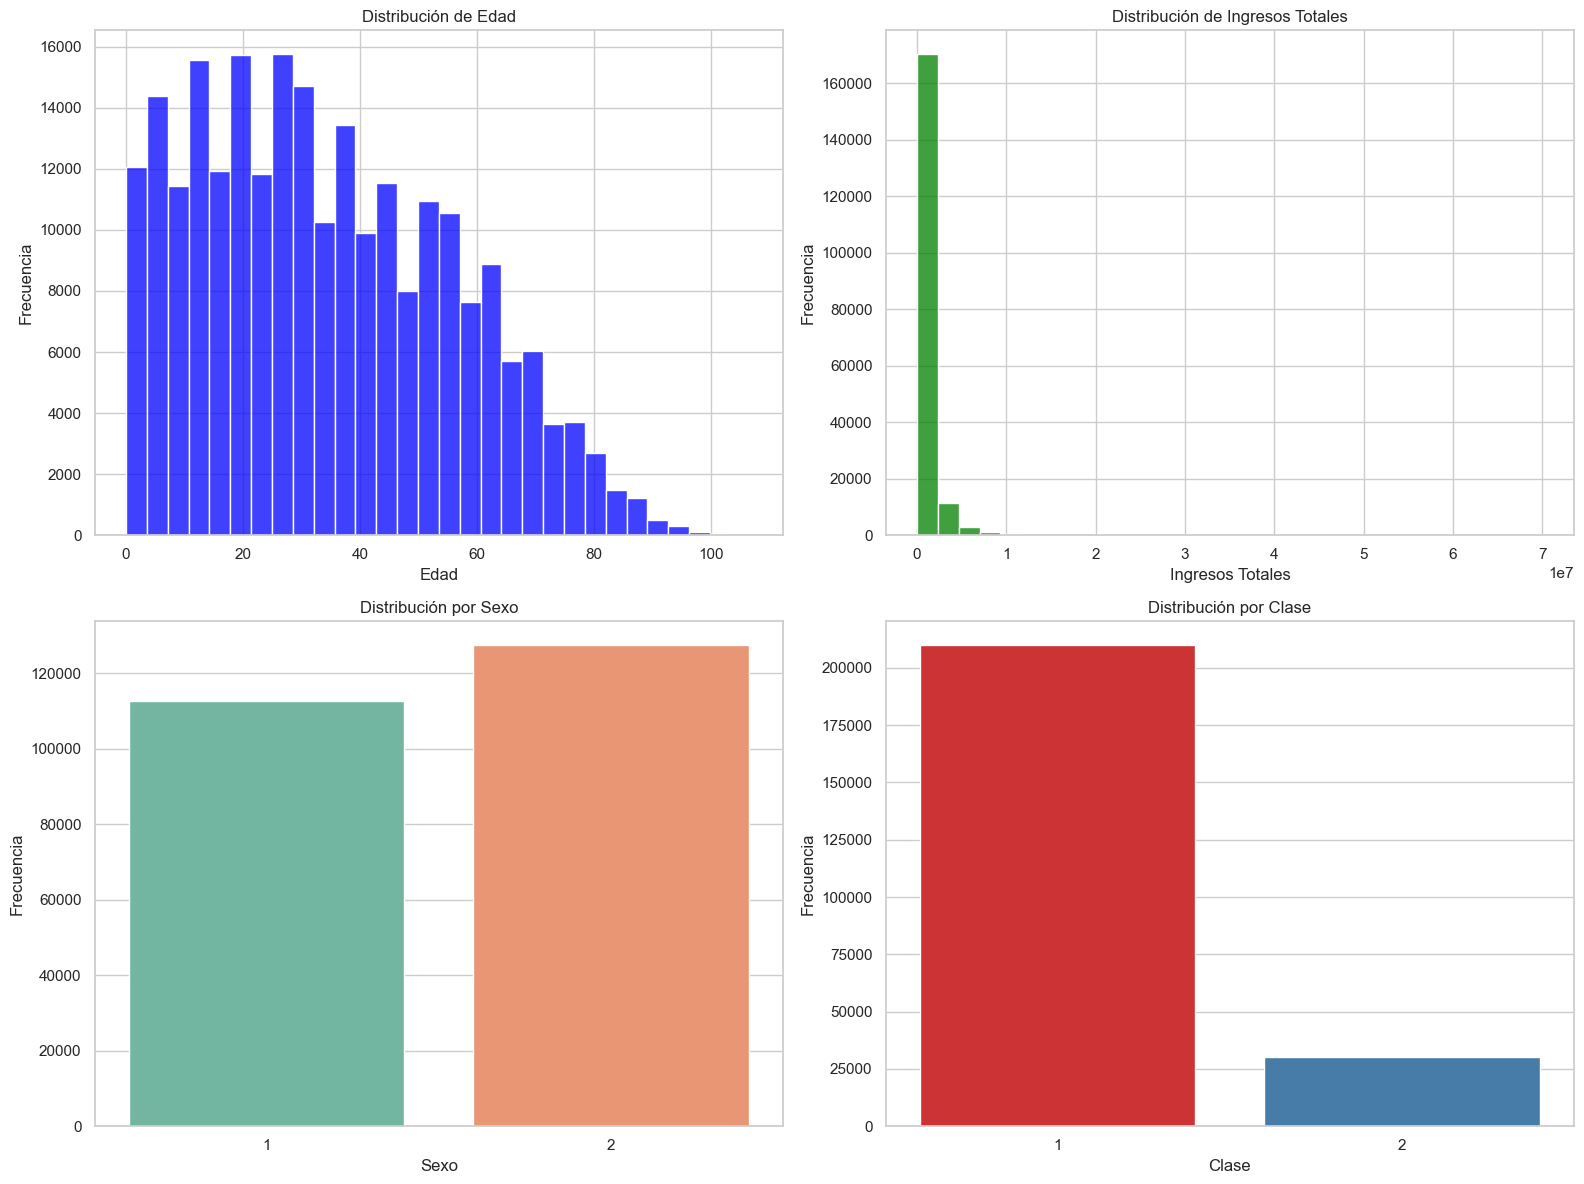

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(16, 12))

# Gráfico 1: Distribución de edades (p6040)
plt.subplot(2, 2, 1)
sns.histplot(personas_data['p6040'], kde=False, color='blue', bins=30)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Gráfico 2: Distribución de ingresos totales (ingtot)
plt.subplot(2, 2, 2)
sns.histplot(personas_data['ingtot'].dropna(), kde=False, color='green', bins=30)
plt.title('Distribución de Ingresos Totales')
plt.xlabel('Ingresos Totales')
plt.ylabel('Frecuencia')

# Gráfico 3: Distribución de la variable Sexo (p3271)
plt.subplot(2, 2, 3)
sns.countplot(x='p3271', data=personas_data, palette='Set2')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Gráfico 4: Distribución de la variable Clase (clase)
plt.subplot(2, 2, 4)
sns.countplot(x='clase', data=personas_data, palette='Set1')
plt.title('Distribución por Clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

* Distribución de Edad (p6040): La mayoría de la población se concentra en el rango de 15 a 60 años, con un pico en la adolescencia y otro en la mediana edad.
* Distribución de Ingresos Totales (ingtot): Existe una gran variabilidad en los ingresos, con muchos valores concentrados en los rangos más bajos y algunos casos con ingresos extremadamente altos.
* Distribución por Sexo (p3271): La población está bastante equilibrada entre hombres y mujeres.
* Distribución por Clase (clase): La mayoría de la muestra pertenece a la "Cabecera", con una menor proporción en el "Resto" (centros poblados y áreas rurales dispersas).

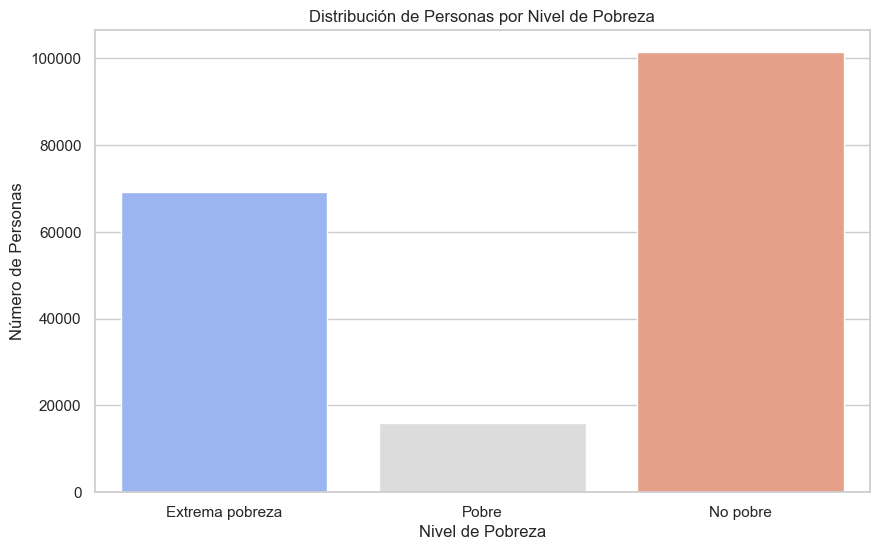

In [27]:
# Niveles de Pobreza:
# Ingreso total: 'ingtot'
# Número de personas en el hogar: 'secuencia_p'

# Umbrales Colombia:
# Pobreza extrema: ingreso per cápita < 160302
# Pobreza: 160302 <= ingreso per cápita < 351480
# No pobre: ingreso per cápita >= 351480

# Calcular el ingreso per cápita
personas_data['ingreso_per_capita'] = personas_data['ingtot'] / personas_data['secuencia_p']

# Categorizar según niveles de pobreza
personas_data['nivel_pobreza'] = pd.cut(personas_data['ingreso_per_capita'], 
                             bins=[-1, 160302, 351480, float('inf')],
                             labels=['Extrema pobreza', 'Pobre', 'No pobre'])

# Crear gráfico de distribución por nivel de pobreza
plt.figure(figsize=(10, 6))
sns.countplot(x='nivel_pobreza', data=personas_data, palette='coolwarm')
plt.title('Distribución de Personas por Nivel de Pobreza')
plt.xlabel('Nivel de Pobreza')
plt.ylabel('Número de Personas')
plt.show()

El gráfico muestra la distribución de personas según su nivel de pobreza, con tres categorías principales: Extrema pobreza, Pobre, y No pobre. A partir de este gráfico, se pueden observar las siguientes conclusiones:

**Extrema Pobreza:**
Un número significativo de personas se encuentra en la categoría de "Extrema pobreza". Esto sugiere que una parte considerable de la población vive con ingresos per cápita muy por debajo del umbral necesario para cubrir las necesidades básicas.

**Pobre:**
La categoría "Pobre" tiene una representación menor en comparación con "Extrema pobreza" y "No pobre". Esto podría indicar que, una vez que las personas superan el umbral de extrema pobreza, es menos frecuente que se queden en el rango intermedio antes de pasar a ser considerados "No pobres".

**No Pobre:**
La mayoría de las personas en el conjunto de datos están clasificadas como "No pobre", lo que indica que superan el umbral de 351,480 en términos de ingresos per cápita. Este es el grupo más numeroso, lo que sugiere que, en este conjunto de datos, una gran parte de la población tiene ingresos suficientes para estar fuera de la pobreza según los umbrales establecidos.

## Conclusiones